In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.grid'] = False

color = sns.color_palette()
plt.style.use('fivethirtyeight')

import matplotlib.font_manager as fm
parameters = {
    'axes.labelsize': 12,
    'axes.titlesize': 18,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
}
plt.rcParams.update(parameters)

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir(r'c:\Users\ADMIN_PC\Desktop\data-analysis\kaggle-game-battleground')
train = pd.read_csv('dataset/train_V2.csv')

print(train.head())

print(train.shape)
print(train.isnull().sum())

## 메모리 최적화하기
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    # end_mem = df.memory_usage().sum() / 1024**2
    # print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    # print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df
train = reduce_mem_usage(train)
print(train.info())

               Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1   

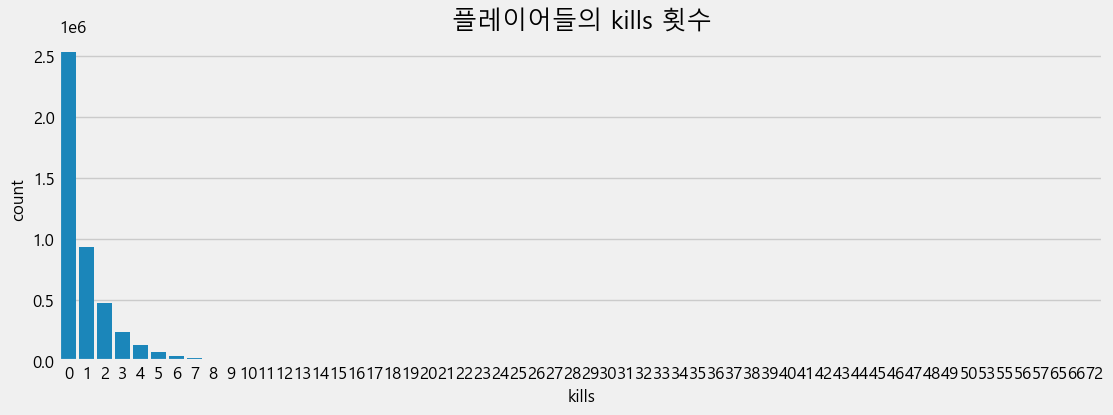


 kills 횟수 평균
0.9247833241810259

 kills 횟수 최대값
72


<Figure size 1200x400 with 0 Axes>

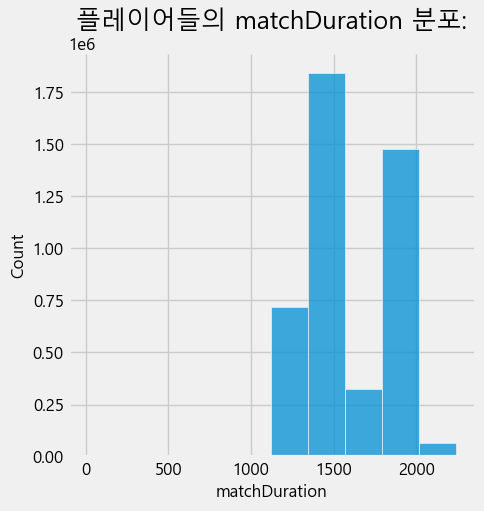

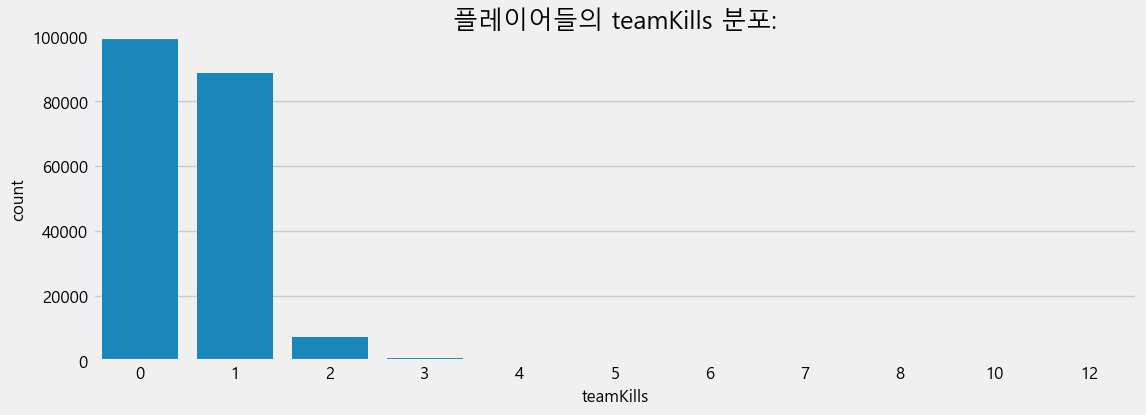

<Figure size 1200x400 with 0 Axes>

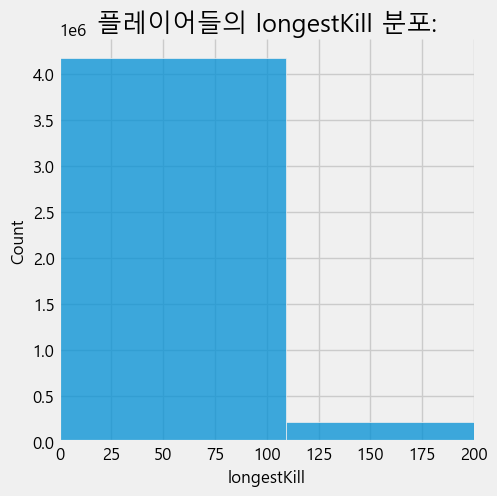

<Figure size 1200x400 with 0 Axes>

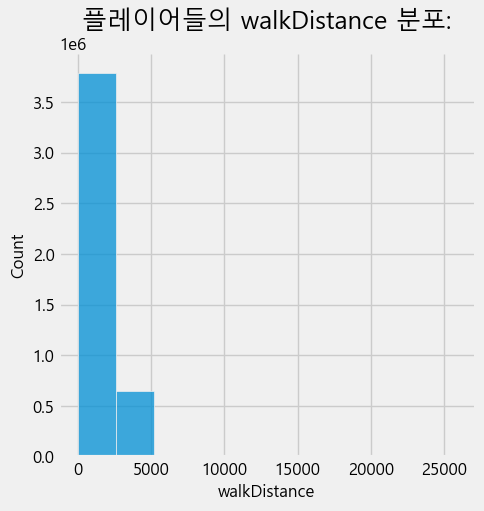

In [3]:
plt.figure(figsize=(12,4))
sns.countplot(x='kills', data=train) # 킬 0번, 1번, 2번.. 각각 몇 명인지
plt.title('플레이어들의 kills 횟수')
plt.show()

print("\n", "kills 횟수 평균")
print(train['kills'].mean())

print("\n", "kills 횟수 최대값")
print(train['kills'].max())

plt.figure(figsize=(12,4))
sns.displot(x=train['matchDuration'], bins=10) # 게임 시간이 어떤 범위에 주로 분포하는가
plt.title('플레이어들의 matchDuration 분포:')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x='teamKills', data=train) # 팀킬 횟수
plt.title('플레이어들의 teamKills 분포:')
plt.ylim([0, 100000])
plt.show()

plt.figure(figsize=(12,4))
sns.displot(x=train['longestKill'], bins=10) # 가장 먼 거리에 쏜 횟수
plt.title('플레이어들의 longestKill 분포:')
plt.xlim([0, 200])
plt.show()

plt.figure(figsize=(12,4))
sns.displot(x=train['walkDistance'], bins=10) # 걸은 거리
plt.title('플레이어들의 walkDistance 분포:')
plt.show()

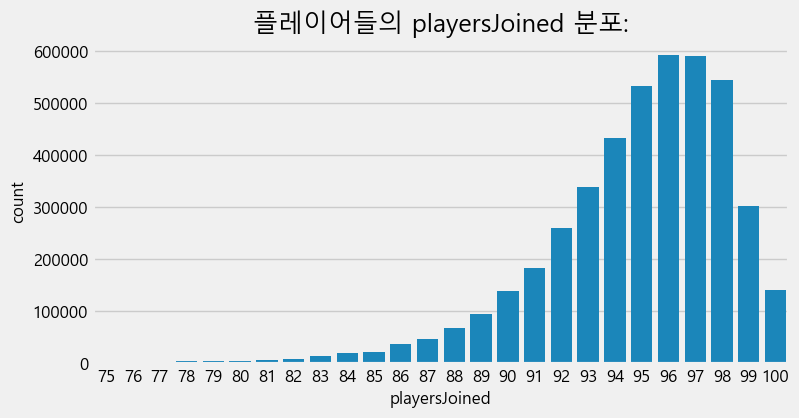

In [4]:
train['playersJoined'] = train.groupby('matchId')['groupId'].transform('count')
plt.figure(figsize=(8,4))
sns.countplot(x=train[train['playersJoined']>=75]['playersJoined'])
plt.title('플레이어들의 playersJoined 분포:')
plt.show()

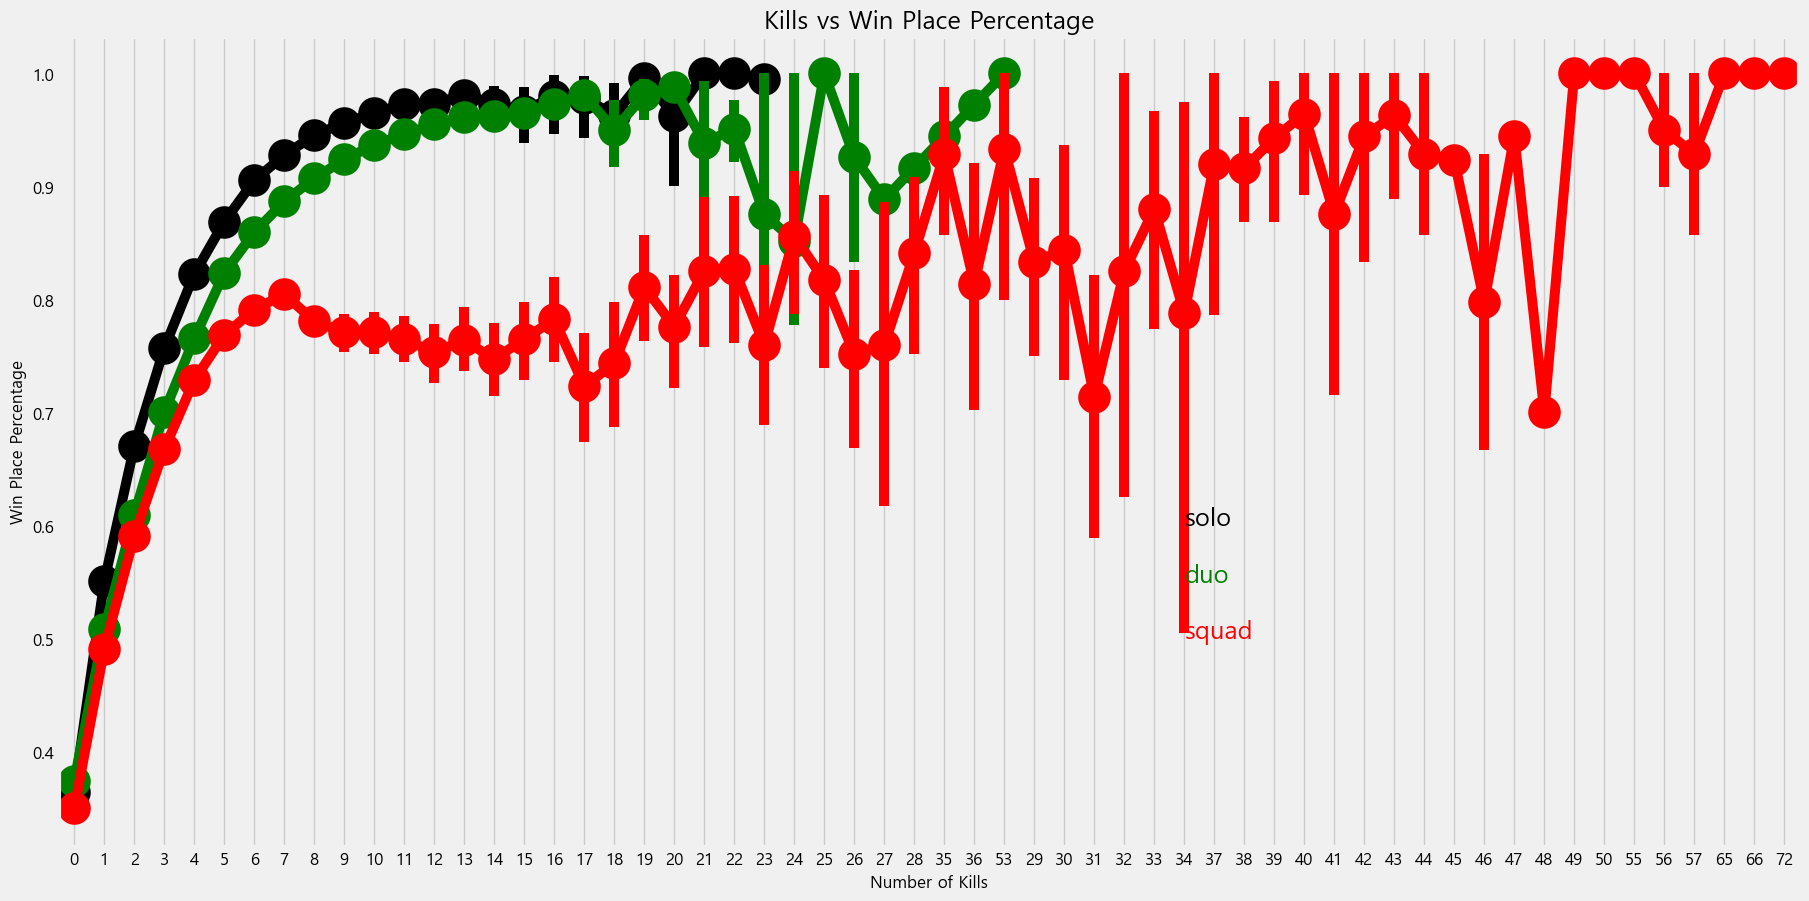

In [5]:
train['matchType'].value_counts()

solo = train[train['numGroups'] > 50]
duo = train[(train['numGroups'] > 25) & (train['numGroups'] <= 50)]
squad = train[train['numGroups'] <= 25]

f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solo, color='black')
sns.pointplot(x='kills',y='winPlacePerc',data=duo, color='green')
sns.pointplot(x='kills',y='winPlacePerc',data=squad, color='red')
plt.text(37,0.6,'solo',fontsize=18,color='black')
plt.text(37,0.55,'duo',fontsize=18,color='green')
plt.text(37,0.5,'squad',fontsize=18,color='red')
plt.xlabel('Number of Kills', fontsize=12, color='black')
plt.ylabel('Win Place Percentage', fontsize=12, color='black')
plt.title('Kills vs Win Place Percentage', fontsize=18, color='black')
plt.grid()
plt.show()

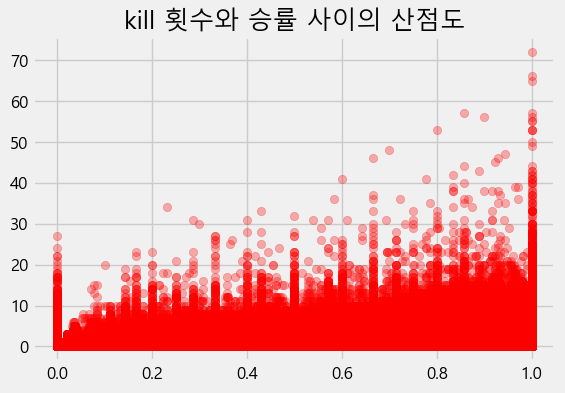

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(x=train['winPlacePerc'],y=train['kills'],color='red',alpha=0.3)
plt.title('kill 횟수와 승률 사이의 산점도')
plt.show()

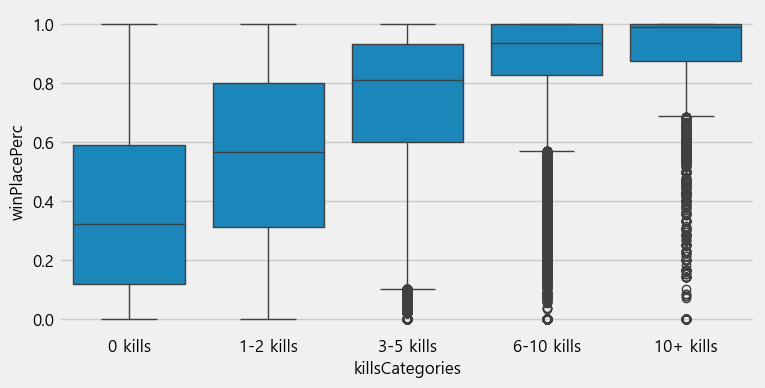

In [7]:
kills = train[['kills','winPlacePerc']]
kills['killsCategories'] = pd.cut(kills['kills'],[-1,0,2,5,10,80], labels=['0 kills','1-2 kills','3-5 kills','6-10 kills','10+ kills'])

plt.figure(figsize=(8,4))
sns.boxplot(x='killsCategories',y='winPlacePerc',data=kills)
plt.show()

In [8]:
print("결측치 개수:", train['winPlacePerc'].isnull().sum())

결측치 개수: 1


In [9]:
train[train['winPlacePerc'].isnull()]
train = train.drop(2744604).reset_index(drop=True)

In [10]:
train['healsandboosts'] = train['heals'] + train['boosts']
train.drop(['heals','boosts'], axis=1, inplace=True)

In [11]:
train['totalDistance'] = train['walkDistance'] + train['rideDistance'] + train['swimDistance']

train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

train.drop(['totalDistance', 'killsWithoutMoving'], axis=1, inplace=True)
train.drop(train[train['roadKills'] > 10].index, inplace=True)
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)
train.drop(train[train['walkDistance'] > 10000].index, inplace=True)
train.drop(train[train['rideDistance'] > 20000].index, inplace=True)
train.drop(train[train['swimDistance'] > 2000].index, inplace=True)
print(train.shape)

(4445024, 29)


In [12]:
train = pd.get_dummies(train, columns=['matchType'])
train[train.columns[27:]] = train[train.columns[27:]].astype(int)

train['groupId'] = train['groupId'].astype('category')
train['matchId'] = train['matchId'].astype('category')
train['groupId_cat'] = train['groupId'].cat.codes
train['matchId_cat'] = train['matchId'].cat.codes

train.drop(['groupId', 'matchId'], axis=1, inplace=True)

print(train[['groupId_cat', 'matchId_cat']].head())

   groupId_cat  matchId_cat
0       613630        30085
1       827634        32751
2       843325         3143
3      1340149        45260
4      1757447        20531


In [13]:
print("Id 고유값 개수:", train['Id'].nunique())
train.drop('Id', axis=1, inplace=True)
print(train.shape)


Id 고유값 개수: 4445024
(4445024, 43)


In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

sample = 500000
df_sample = train.sample(n=sample)

y = df_sample['winPlacePerc']
df = df_sample.drop('winPlacePerc', axis=1)

def split_vals(a, n:int):
    return a[:n].copy(), a[n:].copy()

val_perc = 0.12
n_valid = int(val_perc * sample)
n_trn = len(df) - n_valid

# Split
raw_train, raw_valid = split_vals(df_sample, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [29]:
def print_score(m: RandomForestRegressor):
    res = ['mae train:', mean_absolute_error(y_train, m.predict(X_train)),
           'mae valid:', mean_absolute_error(y_valid, m.predict(X_valid))]
    if hasattr(m, 'oob_score_'):
        res.append(m.oob_score_)
    print(res)

rf = RandomForestRegressor(
    n_estimators=50,
    min_samples_leaf=3,
    max_features='sqrt',
    n_jobs=-1
)
rf.fit(X_train, y_train)
print_score(rf)


['mae train:', 0.041308143285755224, 'mae valid:', 0.061632172276623626]


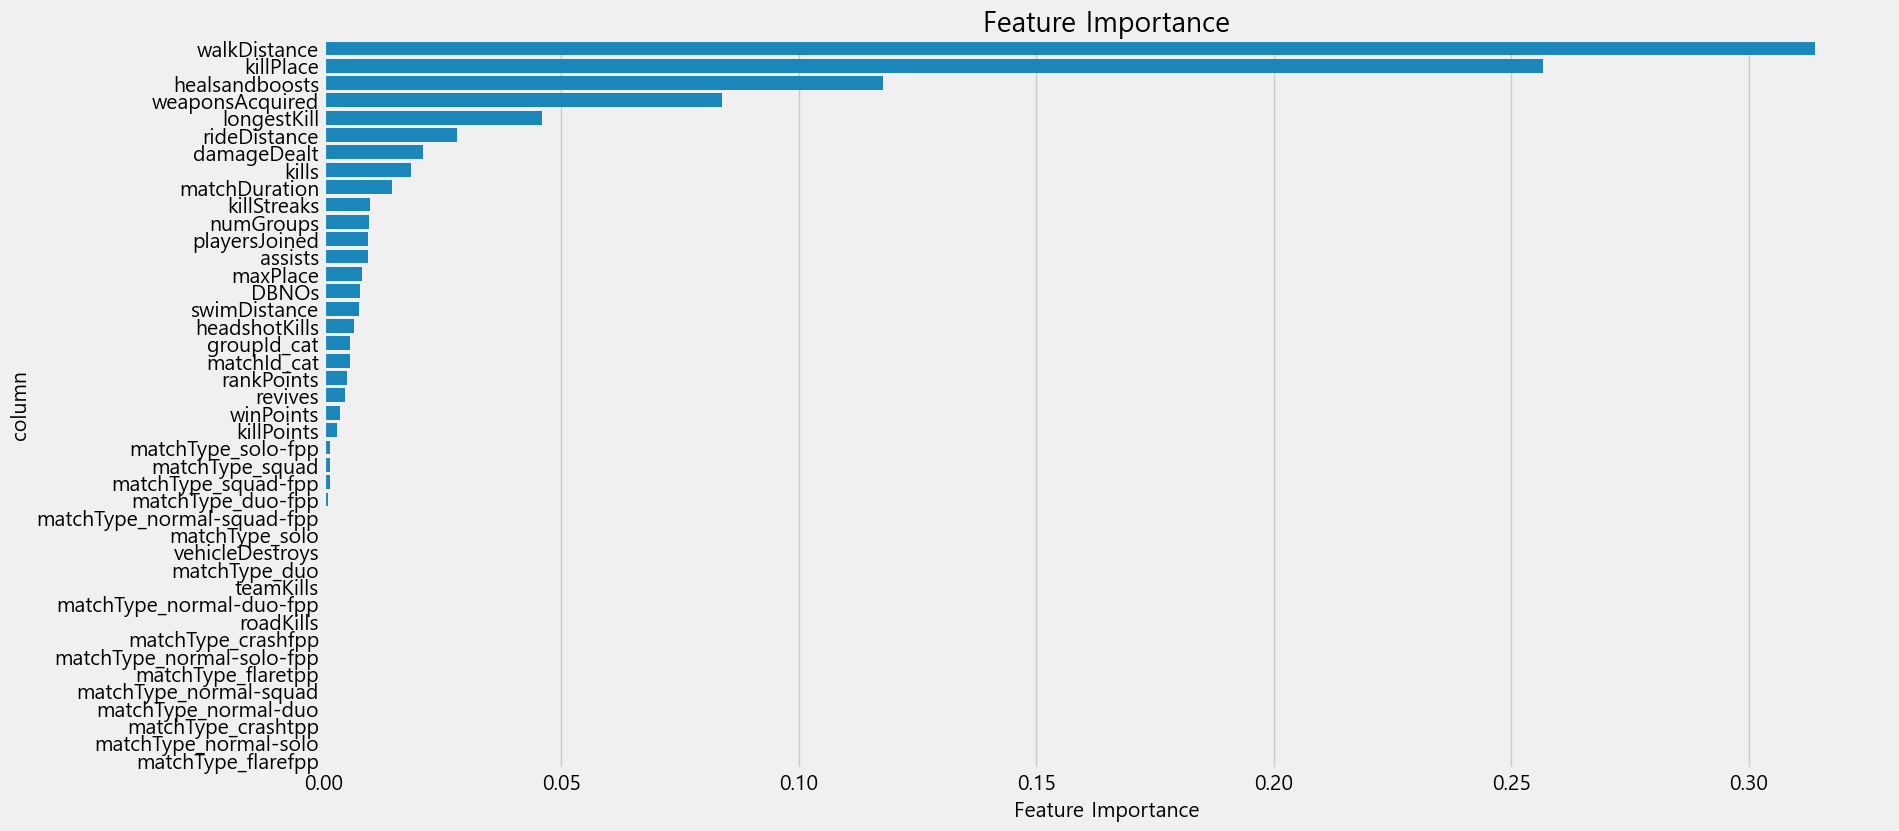

In [28]:
rf_feature_importance = pd.DataFrame(
    rf.feature_importances_,
    X_train.columns,
    columns=['Feature Importance']
)

rf_feature_importance_sort = rf_feature_importance.sort_values('Feature Importance', ascending=False)

plt.figure(figsize=(18, 9))
sns.barplot(x='Feature Importance', y=rf_feature_importance_sort.index, orient='h', data=rf_feature_importance_sort)
plt.title('Feature Importance', size=20)

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Feature Importance', size=15)
plt.ylabel('column', size=15)
plt.show()  

In [30]:
rf_2 = RandomForestRegressor(
    n_estimators=80,
    min_samples_leaf=3,
    max_features='sqrt',
    n_jobs=-1
)
rf_2.fit(X_train, y_train)
print_score(rf_2)

['mae train:', 0.041473571800001774, 'mae valid:', 0.061982222476993046]


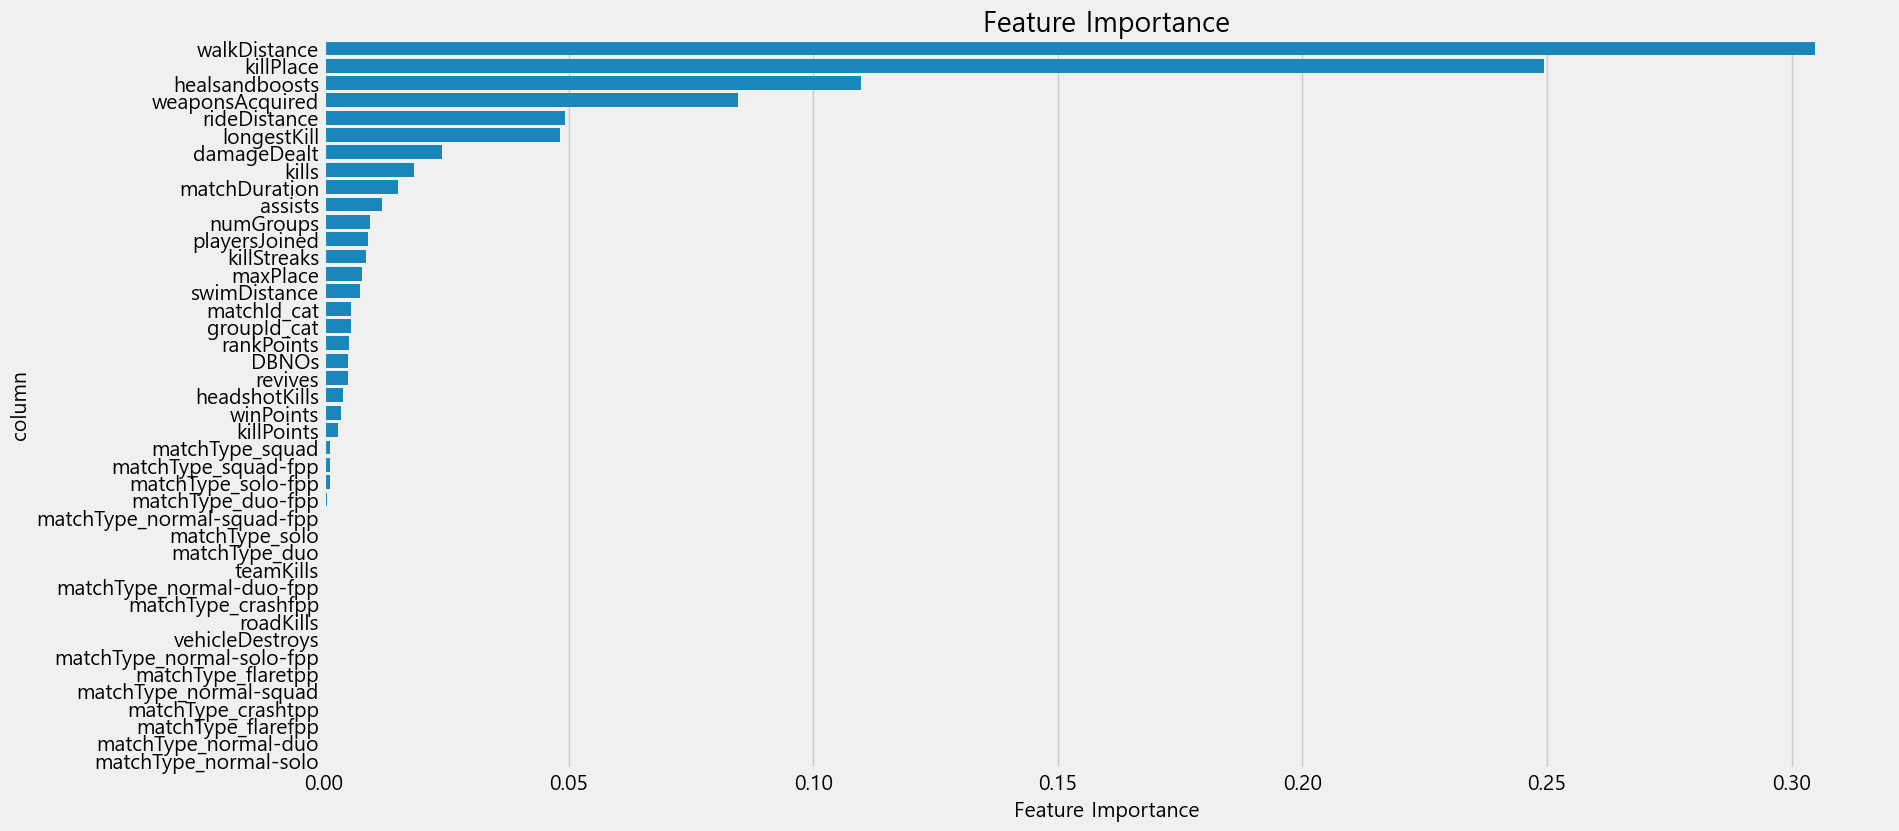

In [31]:
rf_2_feature_importance = pd.DataFrame(
    rf_2.feature_importances_,
    X_train.columns,
    columns=['Feature Importance']
)

rf_2_feature_importance_sort = rf_2_feature_importance.sort_values('Feature Importance', ascending=False)

plt.figure(figsize=(18, 9))
sns.barplot(x='Feature Importance', y=rf_2_feature_importance_sort.index, orient='h', data=rf_2_feature_importance_sort)
plt.title('Feature Importance', size=20)

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Feature Importance', size=15)
plt.ylabel('column', size=15)
plt.show()

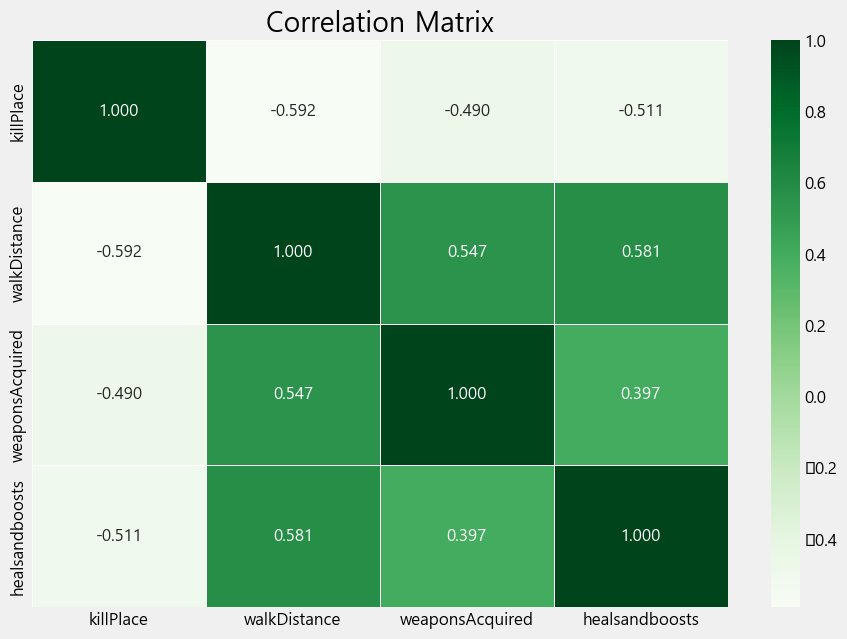

In [36]:
df_keep=df[rf_feature_importance[rf_feature_importance['Feature Importance'] > 0.05].index].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

corr = df_keep.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, cmap='Greens', annot=True, linewidths=0.5, fmt='.3f', cbar=True)
plt.title('Correlation Matrix', size=20)
plt.show()

In [ ]:
val_perc_full = 0.2
n_valid_full = int(val_perc_full * len(train))
n_trn_full = len(train) - n_valid_full

y = train['winPlacePerc']
df_full = train.drop('winPlacePerc', axis=1)

X_train, X_valid = split_vals(df_full, n_trn_full)
y_train, y_valid = split_vals(y, n_trn_full)

print("train:", X_train.shape, "target:", y_train.shape, "validation:", X_valid.shape)